## Data Collection

Source of Data -
The dataset used for dementia diagnosis focuses on health indicators of older adults aged 55 and above. The data was obtained from Kaggle, and it comprises columns such as 'vision,' 'audition,' 'gait_speed_slower,' 'grip_strength_abnormal,' 'low_physical_activity,' and 'memory_complain.'

Relevance of the Data -
The selected features in the dataset play a crucial role in understanding and diagnosing dementia. Each feature provides insights into different aspects of an individual's health, and their relevance to dementia diagnosis is explained below:

Vision -
The visual capabilities of older adults are significant, as eyesight problems are linked to a higher risk of dementia. A study from Michigan Medicine reinforces the importance of monitoring vision issues as potential indicators.

Audition -
Hearing loss has been associated with the development of dementia in older adults. Proper assessment of audition can contribute to early detection and intervention, as indicated by research from the National Institutes of Health.

Gait Speed Slower - 
Individuals with dementia often exhibit slower gait speed, impacting their daily activities. Research published on ScienceDirect emphasizes the correlation between slow gait speed and a steeper cognitive decline, highlighting its relevance in diagnosis.

Grip Strength Abnormal -
Weakening grip strength is identified as a potential marker for cognitive decline and dementia. The dataset includes information on grip strength abnormalities, contributing to a comprehensive diagnostic approach.

Low Physical Activity -
Lack of physical exercise is a known factor that increases the risk of developing dementia. Monitoring physical activity levels is crucial for identifying individuals at higher risk.

The target variable, "memory_complain," serves as an indicator where "Yes" implies individuals experiencing memory-related issues, a common sign of dementia, and "No" indicating no reported problems with memory.

**References:**
1. [Michigan Medicine - Dementia more common in older adults with vision issues](https://www.michiganmedicine.org/health-lab/study-shows-dementia-more-common-older-adults-vision-issues)
2. [NIH Research Matters - Hearing Aids Slow Cognitive Decline in People at High Risk](https://www.nih.gov/news-events/nih-research-matters/hearing-aids-slow-cognitive-decline-people-high-risk#:~:text=Studies%20have%20found%20an%20association,the%20development%20of%20cognitive%20problems.)
3. [ScienceDirect - Slow gait speed and the risk of cognitive decline and dementia: A systematic review and network meta-analysis](https://www.sciencedirect.com/science/article/pii/S0531556519302906#:~:text=Individuals%20presenting%20with%20slow%20gait,with%20a%20faster%20gait%20speed.)
4. [NIH - Grip strength](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7890203/)
5. [Alzheimer's Society UK - Physical activity and exercise](https://www.alzheimers.org.uk/about-dementia/managing-the-risk-of-dementia/reduce-your-risk-of-dementia/physical-activity#:~:text=A%20lack%20of%20physical%20exercise,and%20reduced%20rates%20of%20dementia.)

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

In [2]:
# Load dataset into a DataFrame
df = pd.read_csv('dataset.csv')

# Extract relevant columns
selected_columns = ['vision', 'audition', 'gait_speed_slower', 'grip_strength_abnormal', 'low_physical_activity', 'memory_complain']
df_selected = df[selected_columns].copy()

# Display the first few rows of the selected DataFrame
print(df_selected.head())


            vision          audition gait_speed_slower grip_strength_abnormal  \
0  Sees moderately  Hears moderately               Yes                     No   
1  Sees moderately  Hears moderately               Yes                     No   
2  Sees moderately  Hears moderately               Yes                     No   
3  Sees moderately  Hears moderately               Yes                     No   
4        Sees well        Hears well                No                     No   

  low_physical_activity memory_complain  
0                    No              No  
1                    No              No  
2                    No              No  
3                    No              No  
4                    No             Yes  


# Data Preparation

Handling Missing Values - 

Three columns in the memory_complain feature had missing values. Instead of imputing these missing values with methods like median or forward/backward fill, the decision was made to remove the corresponding rows. This approach acknowledges the uniqueness of each individual's health condition, and imputing values might introduce bias.


Ordinal Encoding - 

The vision and audition columns, which represent ordinal categories such as "Sees poorly," "Sees moderately," "Sees well," "Hears poorly," "Hears moderately," and "Hears well," were ordinal encoded. This encoding is suitable when the values exhibit a meaningful order, preserving the ordinal relationship between different categories.


One-Hot Encoding - 

For categorical columns like 'gait_speed_slower', 'grip_strength_abnormal', and 'low_physical_activity,' where each category represents a binary "Yes" or "No" response, one-hot encoding was applied. This transformation creates binary columns for each category, capturing the presence or absence of each condition.


Label Encoding Target -

The target variable, memory_complain, was label encoded to convert categorical values into numerical format. This is a common preprocessing step when dealing with classification tasks.


Handling Class Imbalance with SMOTE-N - 

Due to the categorical nature of all columns and the relatively small dataset, SMOTE-N (Synthetic Minority Over-sampling Technique for Nominal features) was chosen to address class imbalance. SMOTE-N is an extension of SMOTE tailored for datasets with all categorical features.


Stratified K-Fold Cross-Validation -

To ensure robust model evaluation, especially with a limited dataset (now 113 rows after handling missing values), stratified k-fold cross-validation was employed. This method maintains the distribution of the target variable across different folds, providing a more representative assessment of model performance.


Standard Scaling -

Standard scaling was applied to both the training and test datasets using StandardScaler. This step ensures that the model is trained on standardized data, preventing features with different scales from dominating the learning process and enhancing convergence for optimization algorithms.

In [3]:
# Print concise DataFrame information
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   vision                  117 non-null    object
 1   audition                117 non-null    object
 2   gait_speed_slower       117 non-null    object
 3   grip_strength_abnormal  117 non-null    object
 4   low_physical_activity   117 non-null    object
 5   memory_complain         113 non-null    object
dtypes: object(6)
memory usage: 5.6+ KB


In [4]:

# List of columns with integer data type
int_columns = df_selected.select_dtypes(include='int').columns

# List of columns with float data type
float_columns = df_selected.select_dtypes(include='float').columns

# List of columns with object data type
object_columns = df_selected.select_dtypes(include='object').columns

# Check integer columns for non-numeric values
for column in int_columns:
    try:
        pd.to_numeric(df_selected[column], errors='raise')
    except ValueError as e:
        print(f"Column '{column}' has non-numeric values: {e}")

# Check float columns for non-numeric values
for column in float_columns:
    try:
        pd.to_numeric(df_selected[column], errors='raise')
    except ValueError as e:
        print(f"Column '{column}' has non-numeric values: {e}")
        
# Check object columns for non-object values
for column in object_columns:
    if not pd.api.types.is_object_dtype(df_selected[column]):
        print(f"Column '{column}' has non-object values.")


In [5]:
# Generate descriptive statistics
df_selected.describe()

vision    audition gait_speed_slower grip_strength_abnormal  \
count         117         117               117                    117   
unique          3           2                 2                      2   
top     Sees well  Hears well                No                    Yes   
freq           78          89                73                     59   

       low_physical_activity memory_complain  
count                    117             113  
unique                     2               2  
top                       No              No  
freq                      99              97

In [6]:
# Print information about DataFrame shape, columns, missing values, and unique values
print ("Rows     : " , df_selected.shape[0])
print ("Columns  : " , df_selected.shape[1])
print ("\nFeatures : \n" , df_selected.columns.tolist())
print ("\nMissing values :  ", df_selected.isnull().sum().values.sum())
print ("\nUnique values :  \n",df_selected.nunique())
# Print unique values for each column
for column in df_selected.columns:
    print(f"{column} unique values:\n{df_selected[column].unique()}\n")


Rows     :  117
Columns  :  6

Features : 
 ['vision', 'audition', 'gait_speed_slower', 'grip_strength_abnormal', 'low_physical_activity', 'memory_complain']

Missing values :   4

Unique values :  
 vision                    3
audition                  2
gait_speed_slower         2
grip_strength_abnormal    2
low_physical_activity     2
memory_complain           2
dtype: int64
vision unique values:
['Sees moderately' 'Sees well' 'Sees poorly']

audition unique values:
['Hears moderately' 'Hears well']

gait_speed_slower unique values:
['Yes' 'No']

grip_strength_abnormal unique values:
['No' 'Yes']

low_physical_activity unique values:
['No' 'Yes']

memory_complain unique values:
['No' 'Yes' nan]



In [7]:
# Count the number of missing values in each column of the DataFrame
df_selected.isnull().sum()

vision                    0
audition                  0
gait_speed_slower         0
grip_strength_abnormal    0
low_physical_activity     0
memory_complain           4
dtype: int64

In [8]:
# Remove rows with missing values
df_selected_cleaned = df_selected.dropna()

# Display the first few rows of the cleaned DataFrame
print(df_selected_cleaned.head())

            vision          audition gait_speed_slower grip_strength_abnormal  \
0  Sees moderately  Hears moderately               Yes                     No   
1  Sees moderately  Hears moderately               Yes                     No   
2  Sees moderately  Hears moderately               Yes                     No   
3  Sees moderately  Hears moderately               Yes                     No   
4        Sees well        Hears well                No                     No   

  low_physical_activity memory_complain  
0                    No              No  
1                    No              No  
2                    No              No  
3                    No              No  
4                    No             Yes  


In [9]:
df_selected_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 0 to 116
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   vision                  113 non-null    object
 1   audition                113 non-null    object
 2   gait_speed_slower       113 non-null    object
 3   grip_strength_abnormal  113 non-null    object
 4   low_physical_activity   113 non-null    object
 5   memory_complain         113 non-null    object
dtypes: object(6)
memory usage: 6.2+ KB


In [10]:
# Reset the index of the cleaned DataFrame
df_selected_cleaned_reset = df_selected_cleaned.reset_index(drop=True)

# Display the first few rows of the cleaned and reset DataFrame
print(df_selected_cleaned_reset.head())

            vision          audition gait_speed_slower grip_strength_abnormal  \
0  Sees moderately  Hears moderately               Yes                     No   
1  Sees moderately  Hears moderately               Yes                     No   
2  Sees moderately  Hears moderately               Yes                     No   
3  Sees moderately  Hears moderately               Yes                     No   
4        Sees well        Hears well                No                     No   

  low_physical_activity memory_complain  
0                    No              No  
1                    No              No  
2                    No              No  
3                    No              No  
4                    No             Yes  


# Plotting the distribution of each categorical variable

In [11]:
# Create subplots for a 2x3 grid
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Iterate through each column and plot its distribution
for i, column in enumerate(df_selected_cleaned_reset.columns):
    ax = axes.flatten()[i]
    df_selected_cleaned_reset[column].value_counts().plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
# Adjust layout for better visualization
plt.tight_layout()

# Display the plot
plt.show()

C:\Users\MYPC\AppData\Local\Temp\ipykernel_13128\2155640750.py:46: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


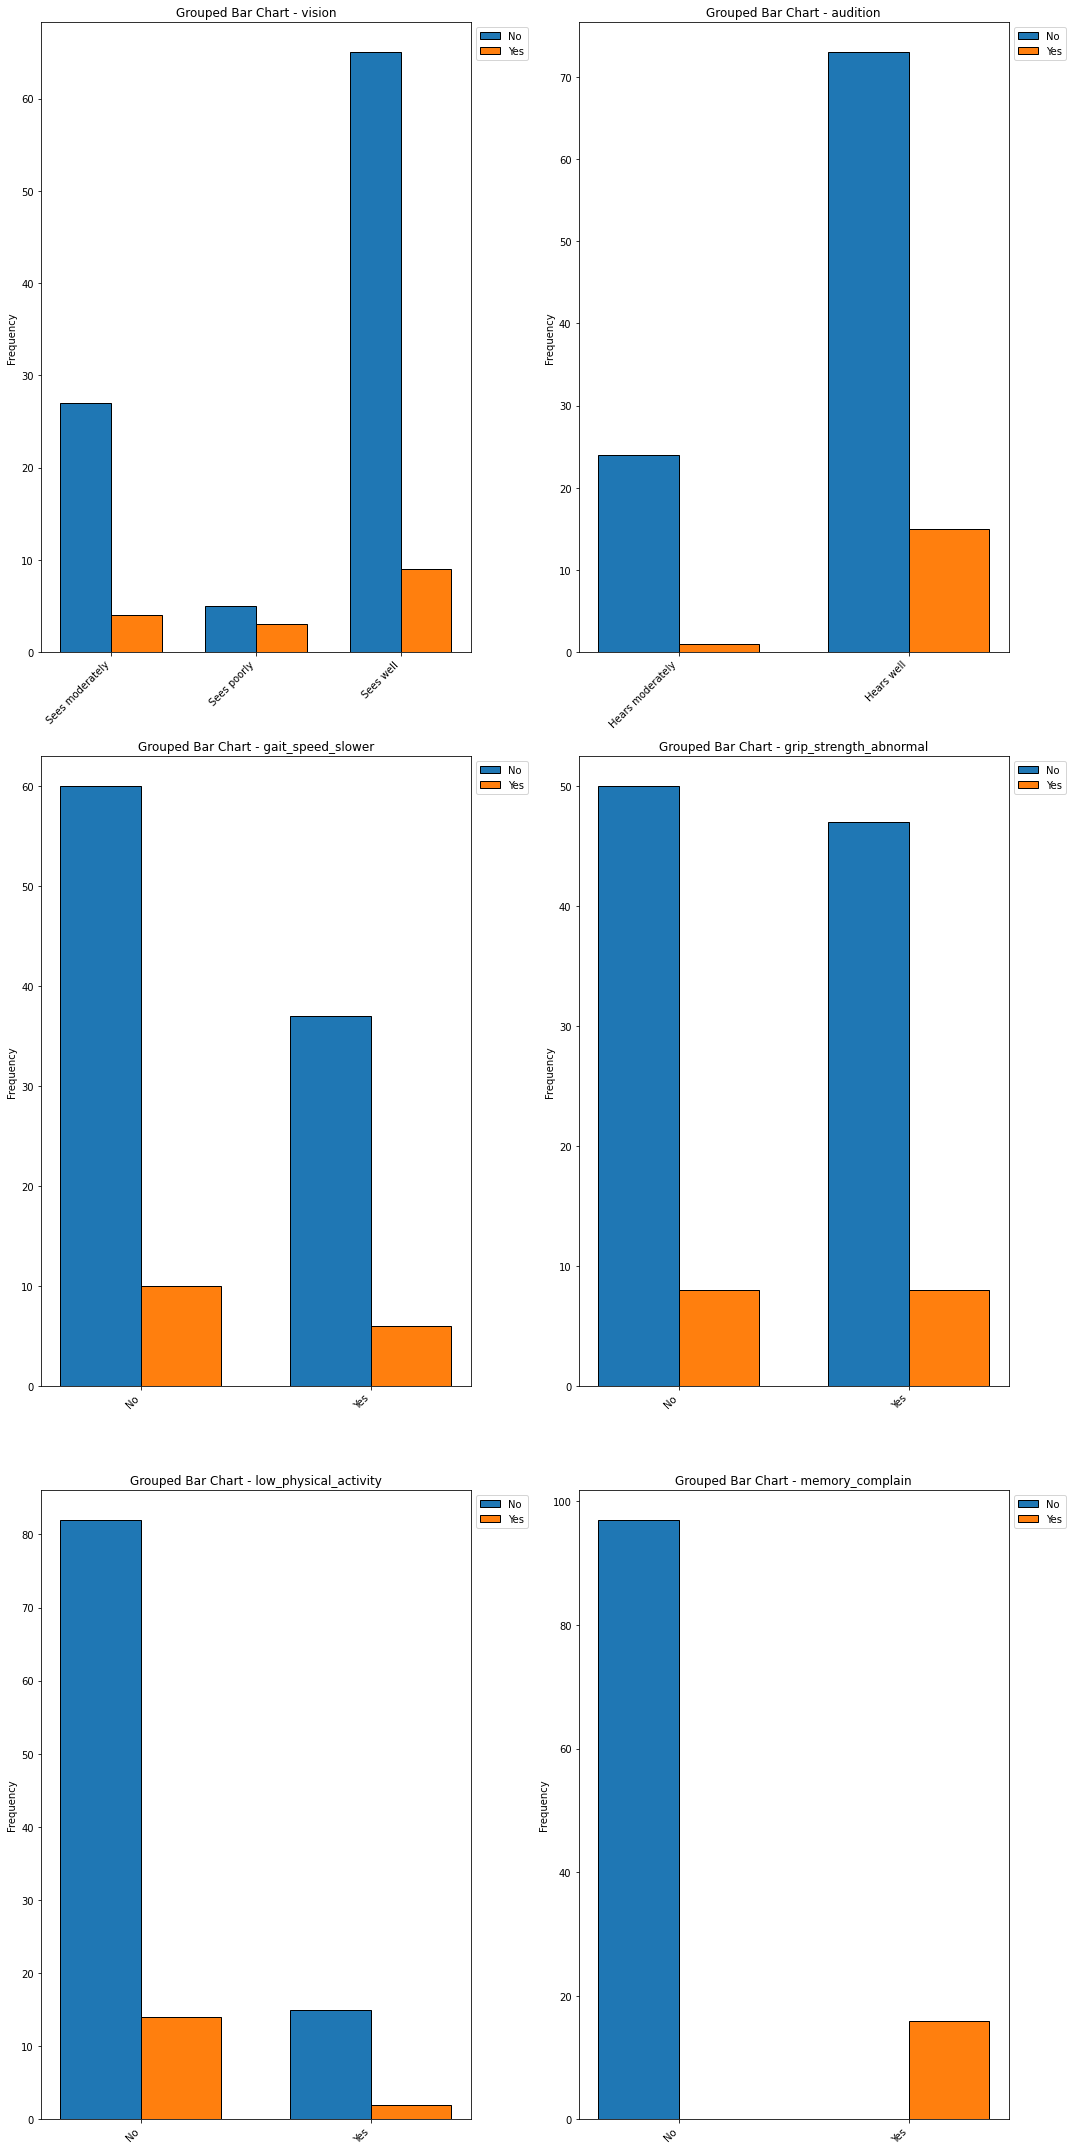

In [12]:
# Identify categorical columns in the DataFrame
categorical_columns =  df_selected_cleaned_reset.select_dtypes(include=['object']).columns

# Determine the number of rows and columns for subplots
num_rows = int(np.ceil(len(categorical_columns) / 2))
num_cols = 2

# Create subplots with adjusted layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 30), constrained_layout=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over categorical columns and plot grouped bar charts
bar_width = 0.35  # Set the width of each bar

for i, column in enumerate(categorical_columns):
    # Get the top 5 categories for the current column
    top_categories =  df_selected_cleaned_reset[column].value_counts().index
    
    # Count the frequency of memory_complain (Yes and No) for each category
    category_counts = df.groupby(column)['memory_complain'].value_counts().unstack().fillna(0)

    # Set the bar positions based on the number of categories
    bar_positions = np.arange(len(category_counts))

    # Plot the grouped bar chart
    axes[i].bar(bar_positions - bar_width/2, category_counts['No'], bar_width, label="No", edgecolor="black")
    axes[i].bar(bar_positions + bar_width/2, category_counts['Yes'], bar_width, label="Yes", edgecolor="black")

    # Set the x-axis ticks and labels without rotation
    axes[i].set_xticks(bar_positions)
    axes[i].set_xticklabels(category_counts.index, rotation=45, ha='right')  # Adjust rotation and ha as needed

    # Set labels and comment out the title line
    axes[i].set_ylabel("Frequency")
    axes[i].set_title(f"Grouped Bar Chart - {column}")

    # Add legend to the right of the subplot
    axes[i].legend(loc='upper left', bbox_to_anchor=(1, 1))

    # Remove gridlines
    axes[i].grid(False)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()


C:\Users\MYPC\AppData\Local\Temp\ipykernel_13128\1068948953.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='memory_complain', y='count', data=grouped_df, ax=axes[i], palette='viridis')
C:\Users\MYPC\AppData\Local\Temp\ipykernel_13128\1068948953.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='memory_complain', y='count', data=grouped_df, ax=axes[i], palette='viridis')
C:\Users\MYPC\AppData\Local\Temp\ipykernel_13128\1068948953.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='memory_complain', y='count', data=grouped_df,

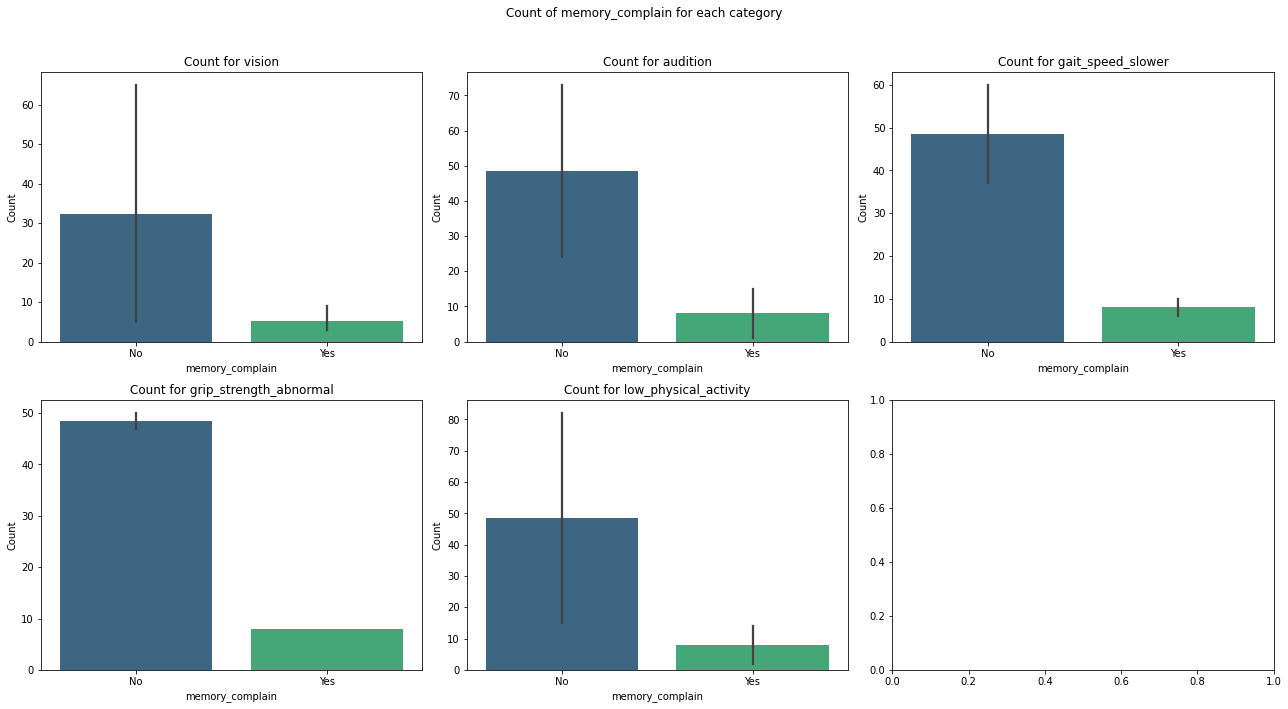

In [13]:
# Define the list of columns to create bar plots
columns_to_plot = ['vision', 'audition', 'gait_speed_slower', 'grip_strength_abnormal', 'low_physical_activity']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle('Count of memory_complain for each category')

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate over each column and create a bar plot
for i, column in enumerate(columns_to_plot):
    grouped_df = df.groupby([column, 'memory_complain']).size().reset_index(name='count')
    
    sns.barplot(x='memory_complain', y='count', data=grouped_df, ax=axes[i], palette='viridis')
    
    axes[i].set_title(f'Count for {column}')
    axes[i].set_xlabel('memory_complain')
    axes[i].set_ylabel('Count')

# Adjust layout and show the plots
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


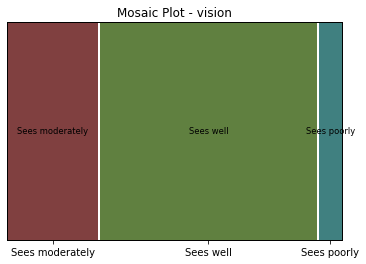

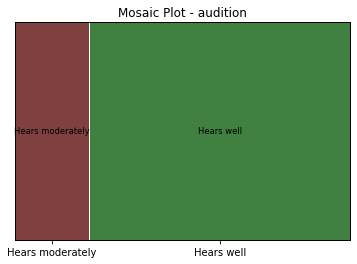

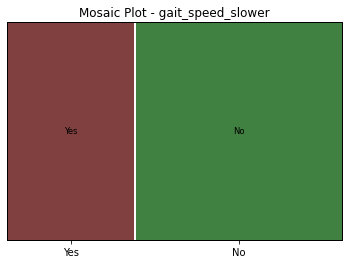

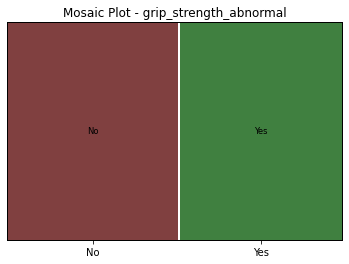

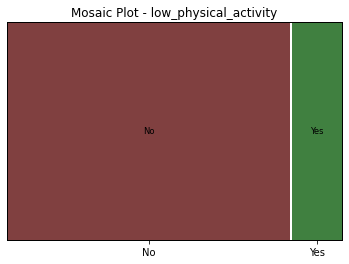

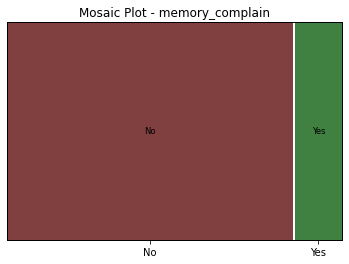

In [14]:
# Generate mosaic plots for each categorical column
for column in categorical_columns:
    mosaic(df_selected_cleaned_reset, [column])
    plt.title(f'Mosaic Plot - {column}')
    plt.show()


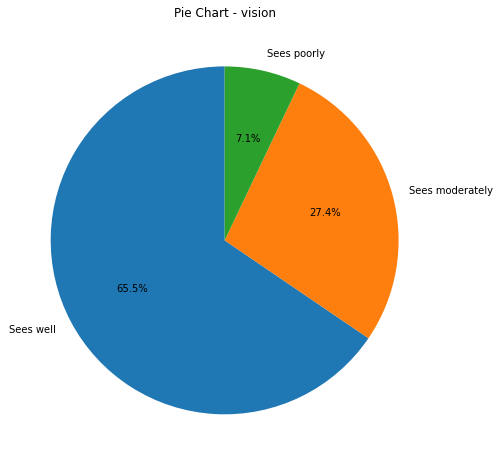

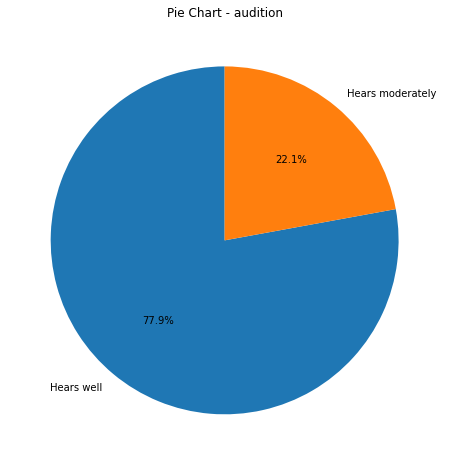

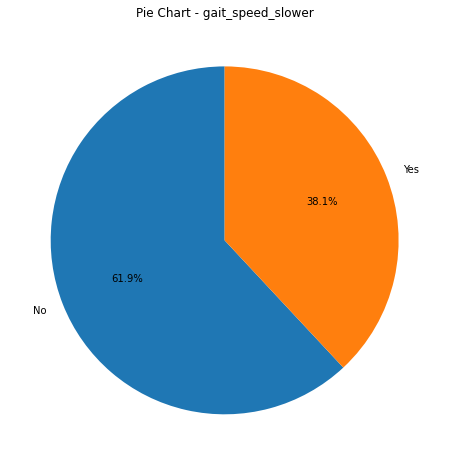

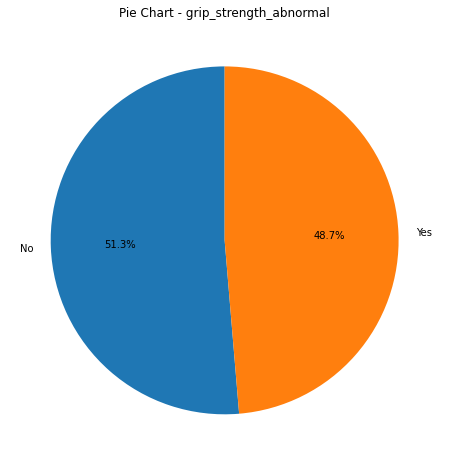

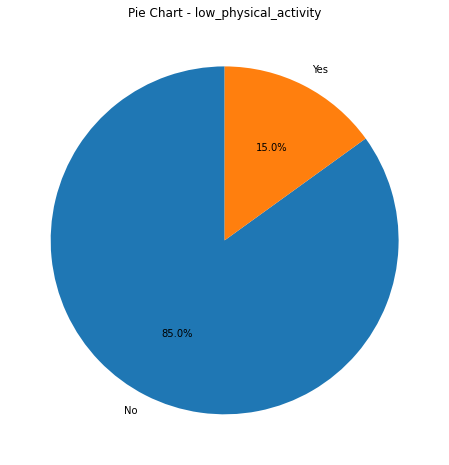

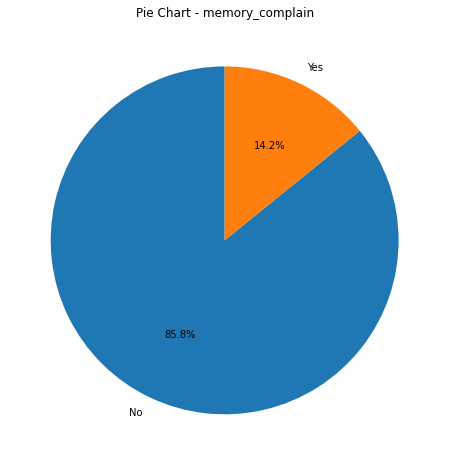

In [15]:
# Generate pie charts for each categorical column
for column in categorical_columns:
     # Plot a pie chart with percentage labels, starting angle, and figure size
    df_selected_cleaned_reset[column].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 8))
    # Plot a pie chart with percentage labels, starting angle, and figure size
    plt.title(f'Pie Chart - {column}')
    plt.ylabel('')
    plt.show()


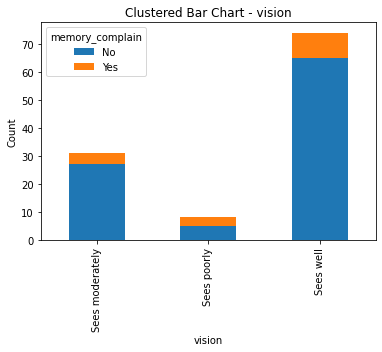

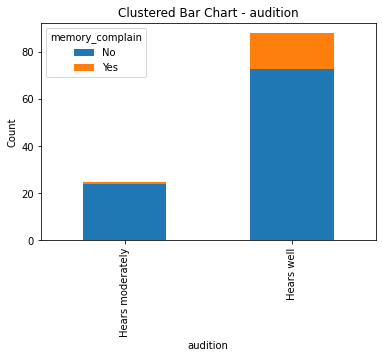

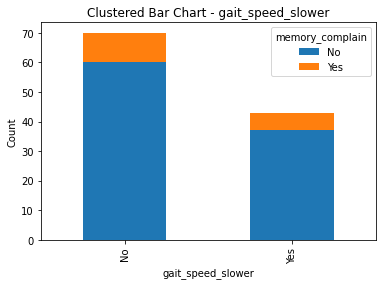

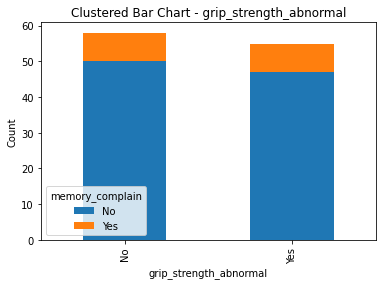

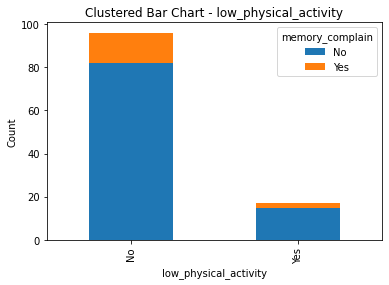

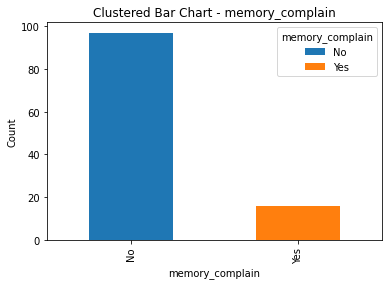

In [16]:
# Clustered Bar Charts
for column in categorical_columns:
    # Create a cross-tabulation and plot a clustered bar chart with stacking
    pd.crosstab(df_selected_cleaned_reset[column], df_selected_cleaned_reset['memory_complain']).plot(kind='bar', stacked=True)
    # Set the title, x-axis label, y-axis label, and show the plot
    plt.title(f'Clustered Bar Chart - {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

In [18]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
import joblib


# Create an OrdinalEncoder for 'vision' and 'audition'
ordinal_encoder = OrdinalEncoder()
df_selected_cleaned_reset[['vision', 'audition']] = ordinal_encoder.fit_transform(df_selected_cleaned_reset[['vision', 'audition']])

# One-Hot encode other categorical columns
categorical_columns = ['gait_speed_slower', 'grip_strength_abnormal', 'low_physical_activity']
df_selected_cleaned_reset = pd.get_dummies(df_selected_cleaned_reset, columns=categorical_columns)

# Label encode the 'memory_complain' column
label_encoder = LabelEncoder()
df_selected_cleaned_reset['memory_complain'] = label_encoder.fit_transform(df_selected_cleaned_reset['memory_complain'])

# Display the modified DataFrame
print(df_selected_cleaned_reset)

# Display the mapping for 'memory_complain'
memory_complain_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Memory Complain Mapping:", memory_complain_mapping)

joblib.dump(ordinal_encoder, 'ordinal_encoder.joblib')

     vision  audition  memory_complain  gait_speed_slower_No  \
0       0.0       0.0                0                     0   
1       0.0       0.0                0                     0   
2       0.0       0.0                0                     0   
3       0.0       0.0                0                     0   
4       2.0       1.0                1                     1   
..      ...       ...              ...                   ...   
108     2.0       1.0                0                     1   
109     2.0       1.0                0                     1   
110     2.0       0.0                0                     0   
111     2.0       0.0                0                     0   
112     2.0       0.0                0                     0   

     gait_speed_slower_Yes  grip_strength_abnormal_No  \
0                        1                          1   
1                        1                          1   
2                        1                          1   
3  

['ordinal_encoder.joblib']

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTEN
from sklearn.metrics import accuracy_score
import numpy as np

#drop target column
X = df_selected_cleaned_reset.drop("memory_complain", axis=1)
y = df_selected_cleaned_reset["memory_complain"]

# Print class distribution before oversampling
print("Class Distribution Before Oversampling:")
print(y.value_counts())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

# Use SMOTEN to oversample the minority class on the training set only
smoten = SMOTEN(random_state=0)
X_resampled, y_resampled = smoten.fit_resample(X_train, y_train)

# Print class distribution after oversampling
print("\nClass Distribution After Oversampling:")
print(y_resampled.value_counts())

# Perform k-fold cross-validation with oversampling
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Initialize an array to store cross-validation accuracies
cv_accuracies = []

# Initialize a Logistic Regression model
lr = LogisticRegression()

for train_index, val_index in stratified_kfold.split(X_resampled, y_resampled):
    X_train_fold, X_val_fold = X_resampled.iloc[train_index], X_resampled.iloc[val_index]
    y_train_fold, y_val_fold = y_resampled[train_index], y_resampled[val_index]

    # Create Logistic Regression model for each fold
    # Fit it on the resampled data for this fold
    lr_fold = lr.fit(X_train_fold, y_train_fold)

    # Prediction with validation dataset for this fold
    y_val_pred = lr_fold.predict(X_val_fold)

    # Accuracy for this fold
    accuracy_fold = accuracy_score(y_val_fold, y_val_pred)
    cv_accuracies.append(accuracy_fold)

# Print testing accuracy
y_test_pred = lr_fold.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print("\nTesting Accuracy: {:.2f}".format(accuracy_test))

# After cross-validation, train the final model using the entire original training set
final_model = lr.fit(X_train, y_train)

print("\nCross-Validation Accuracy: {:.2f} (+/- {:.2f})".format(np.mean(cv_accuracies), np.std(cv_accuracies) * 2))


Class Distribution Before Oversampling:
0    97
1    16
Name: memory_complain, dtype: int64

Class Distribution After Oversampling:
0    78
1    78
Name: memory_complain, dtype: int64

Testing Accuracy: 0.61

Cross-Validation Accuracy: 0.81 (+/- 0.14)


In [21]:
# Display the first few rows of the resampled DataFrame
pd.DataFrame(X_resampled).head()

vision  audition  gait_speed_slower_No  gait_speed_slower_Yes  \
0     2.0       1.0                     0                      1   
1     2.0       0.0                     1                      0   
2     2.0       1.0                     1                      0   
3     2.0       1.0                     0                      1   
4     2.0       1.0                     0                      1   

   grip_strength_abnormal_No  grip_strength_abnormal_Yes  \
0                          1                           0   
1                          1                           0   
2                          1                           0   
3                          0                           1   
4                          0                           1   

   low_physical_activity_No  low_physical_activity_Yes  
0                         1                          0  
1                         1                          0  
2                         1                          0  
3                         1                          0  
4                         1                          0

In [22]:
# Check the current column names
print(df_selected_cleaned_reset.columns)


df_selected_cleaned_reset['gait_speed_slower'] = df_selected_cleaned_reset['gait_speed_slower_Yes']
df_selected_cleaned_reset['grip_strength_abnormal'] = df_selected_cleaned_reset['grip_strength_abnormal_Yes']
df_selected_cleaned_reset['low_physical_activity'] = df_selected_cleaned_reset['low_physical_activity_Yes']

# Drop the unnecessary columns
columns_to_drop = [
    'gait_speed_slower_No', 'gait_speed_slower_Yes', 
    'grip_strength_abnormal_No', 'grip_strength_abnormal_Yes', 
    'low_physical_activity_No', 'low_physical_activity_Yes'
]


Index(['vision', 'audition', 'memory_complain', 'gait_speed_slower_No',
       'gait_speed_slower_Yes', 'grip_strength_abnormal_No',
       'grip_strength_abnormal_Yes', 'low_physical_activity_No',
       'low_physical_activity_Yes'],
      dtype='object')


In [23]:
# Drop specified columns from the DataFrame and print the remaining columns
df_selected_cleaned_reset = df_selected_cleaned_reset.drop(columns=columns_to_drop, errors='ignore')
print(df_selected_cleaned_reset.columns)

Index(['vision', 'audition', 'memory_complain', 'gait_speed_slower',
       'grip_strength_abnormal', 'low_physical_activity'],
      dtype='object')


In [24]:
# export clean dataset
df_selected_cleaned_reset.to_csv("Cleansed_demenia.csv", index=False)

# Importance and Reason of Data Preparation

Handling Missing Values - 

Missing values can lead to biased analysis and modeling. Addressing them ensures the completeness of the dataset, contributing to accurate insights and model performance.


Data Type Verification - 

Confirming the correct data types for each column is fundamental. It ensures that numerical data is treated as such, preventing errors in calculations and analyses.


Spelling Mistake Checking - 

Ensuring the consistency and correctness of column values and headers improves the overall cleanliness of the dataset. This step is crucial for avoiding confusion and errors in downstream tasks.


Outlier Detection - 

Identifying and handling outliers is essential for generating meaningful summary descriptive statistics. Outliers can significantly impact statistical measures, and their detection aids in obtaining a more accurate representation of the data.


Ensuring Data Uniqueness - 

Checking for duplicate records or entries is vital to maintain the uniqueness of the dataset. Duplicate data can distort analyses and model training, leading to unreliable results.


Encoding and Standardization - 

Encoding categorical variables and standardizing numerical features are necessary steps for compatibility with machine learning algorithms. It ensures fair treatment of different features and enhances model performance.


Data Visualization -

Data visualization provides a clear distribution of each column, aiding in understanding patterns, trends, and potential insights. Visualization is a powerful tool for exploratory data analysis and communicating findings.


Feature Engineering -

Creating new features based on existing ones can enhance the model's ability to capture patterns in the data. Feature engineering is a creative process that often leads to improved model performance.


Handling Imbalanced Data -

In scenarios where classes are imbalanced, data preparation techniques such as oversampling or undersampling may be applied to ensure fair representation of all classes, preventing biases in model training.


Data Scaling -

Scaling numerical features is crucial for algorithms sensitive to the magnitude of variables. Standardization or normalization ensures that each feature contributes proportionally to the model's learning process.

In [25]:
df_selected_cleaned_reset.head()

vision  audition  memory_complain  gait_speed_slower  \
0     0.0       0.0                0                  1   
1     0.0       0.0                0                  1   
2     0.0       0.0                0                  1   
3     0.0       0.0                0                  1   
4     2.0       1.0                1                  0   

   grip_strength_abnormal  low_physical_activity  
0                       0                      0  
1                       0                      0  
2                       0                      0  
3                       0                      0  
4                       0                      0

In [26]:
pd.DataFrame(y_resampled).head()

memory_complain
0                0
1                0
2                0
3                0
4                1

# AI Ethics

Thorough Documentation -
I've diligently documented ethical considerations, delving into the potential impact my predictions may have on individuals' lives.

Open Communication -
I believe in transparently communicating the model's purpose, limitations, and potential effects to the public, healthcare professionals, and stakeholders.

Bias Mitigation and Fairness -
I've conducted a meticulous bias audit on our dataset. I'm implementing algorithms that prioritize fairness and using metrics to ensure equitable outcomes by balancing the amount of target variable for each class.

Awareness of Biases -

I'm keenly aware of potential biases, especially demographic underrepresentation.The documentation outlines the steps we're taking to minimize these biases.

Sharing Data and Model Insights -

I'm committed to openly sharing information about the data sources, model decision-making process, and potential biases. It's about being upfront about the limitations.

Starting with Basic Ethical Documentation -

I've laid the foundation with basic documentation, and I'm committed to an ongoing ethical review process for continuous improvement.

Acknowledging Limited Transparency -
I recognize that there's room for improvement in transparency on providing more detailed information on data and model decisions.

# Model Training

When it comes to model fitting, I adhere to a systematic approach. Initially, I opt for logistic regression as my baseline model. Starting with a simpler model lays a solid foundation before delving into complexity. Considering the categorical nature of my dataset, I explore classifiers such as Random Forest Classifier, Decision Tree Classifier, Non-linear SVM, Linear SVM, Logistic Regression, Neural Network, Gradient Boosting, and Naive Bayes.

Here's a brief rationale behind my choices:

Logistic Regression (Baseline) -

As a starting point, logistic regression provides a simple yet effective foundation.

Random Forest Classifier and Decision Tree Classifier -

These are suitable for datasets with categorical columns, offering ensemble and individual tree-based approaches.

Non-linear SVM and Linear SVM -

SVMs, both linear and non-linear, are versatile and can handle categorical features effectively.

Neural Network (MLP Classifier) -

Neural networks, especially Multi-Layer Perceptron (MLP), can capture complex relationships within the data.

Gradient Boosting -

An ensemble method like gradient boosting is powerful for improving predictive performance.

Naive Bayes (Gaussian Classifier) -

Given the nature of my dataset, I leverage the Gaussian Naive Bayes classifier, suitable for categorical data.


In [27]:
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=0)
 

random_forest.fit(X_resampled, y_resampled)


RandomForestClassifier(random_state=0)

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
# GradientBoostingClassifier
gradient_boost = GradientBoostingClassifier(n_estimators=100, random_state=0)
gradient_boost.fit(X_train, y_train)


gradient_boost.fit(X_resampled, y_resampled)

GradientBoostingClassifier(random_state=0)

In [29]:
from sklearn.tree import DecisionTreeClassifier

# DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=0)


decision_tree.fit(X_resampled, y_resampled)

DecisionTreeClassifier(random_state=0)

In [30]:
from sklearn.svm import SVC

# Non-linear SVM
non_linear_svm = SVC(kernel='rbf',probability=True, random_state=0)

non_linear_svm.fit(X_resampled, y_resampled)


SVC(probability=True, random_state=0)

In [31]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC(random_state=0)

linear_svm.fit(X_resampled, y_resampled)


C:\Users\MYPC\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC(random_state=0)

In [32]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
logistic_regression = LogisticRegression(random_state=0)


logistic_regression.fit(X_resampled, y_resampled)


LogisticRegression(random_state=0)

In [33]:
from sklearn.neural_network import MLPClassifier

# Neural Network
neural_network = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=0)


neural_network.fit(X_resampled, y_resampled)


MLPClassifier(max_iter=1000, random_state=0)

In [34]:
from sklearn.naive_bayes import GaussianNB


# Naive Bayes
naive_bayes = GaussianNB()

naive_bayes.fit(X_resampled, y_resampled)

GaussianNB()

In [35]:
# pip install --upgrade scikit-learn


In [36]:
from sklearn.model_selection import cross_val_predict  # For K-Fold Cross Validation

Training Accuracy: 0.76
Testing Accuracy: 0.57


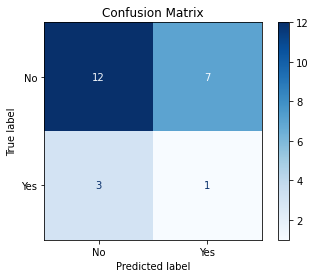

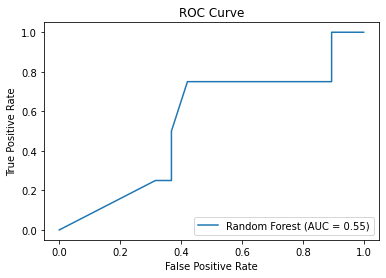

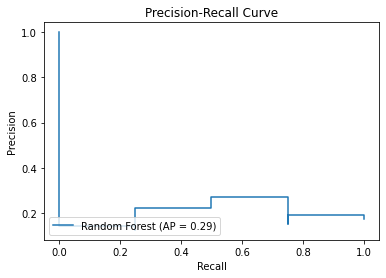

K-Fold Cross Validation Score: 0.87
AUC-ROC Score: 0.55
AUC-PR Score: 0.29


In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import ConfusionMatrixDisplay,PrecisionRecallDisplay, RocCurveDisplay
from sklearn.metrics import roc_curve


# Prediction with testing dataset:
y_test_pred = random_forest.predict(X_test)
y_test_pred_proba = random_forest.predict_proba(X_test)[:, 1]

# Find training accuracy for this model:
accuracy_train = accuracy_score(y_train, random_forest.predict(X_train))
print("Training Accuracy: {:.2f}".format(accuracy_train))

# Find testing accuracy for this model:
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy: {:.2f}".format(accuracy_test))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

# Use ConfusionMatrixDisplay for visualization
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC-ROC Score
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
roc_auc = auc(fpr, tpr)

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest')
roc_display.plot()
plt.title('ROC Curve')
plt.show()

# Precision-Recall Curve and AUC-PR Score
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred_proba)
prc_auc = auc(recall, precision)

pr_display = PrecisionRecallDisplay(precision=precision, recall=recall, average_precision=prc_auc, estimator_name='Random Forest')
pr_display.plot()
plt.title('Precision-Recall Curve')
plt.show()

# K-Fold Cross Validation
num_folds = 10
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
cv_scores = cross_val_score(random_forest, X_train, y_train, cv=kfold, scoring='accuracy')
avg_cv_score = cv_scores.mean()

# Display K-Fold Cross Validation score
print("K-Fold Cross Validation Score: {:.2f}".format(avg_cv_score))

# Display AUC-ROC and AUC-PR Scores
print("AUC-ROC Score: {:.2f}".format(roc_auc))
print("AUC-PR Score: {:.2f}".format(prc_auc))


Training Accuracy: 0.76
Testing Accuracy: 0.57


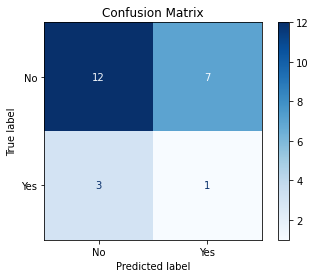

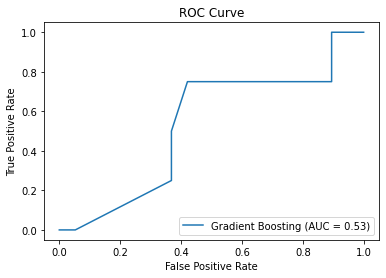

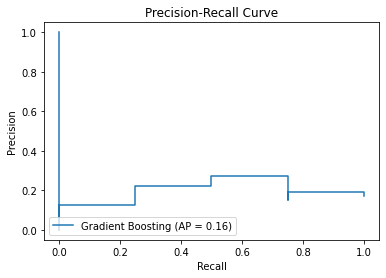

K-Fold Cross Validation Score: 0.87
AUC-ROC Score: 0.53
AUC-PR Score: 0.16


In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import roc_curve

# Prediction with testing dataset:
y_test_pred = gradient_boost.predict(X_test)
y_test_pred_proba = gradient_boost.predict_proba(X_test)[:, 1]

# Find training accuracy for this model:
accuracy_train = accuracy_score(y_train, gradient_boost.predict(X_train))
print("Training Accuracy: {:.2f}".format(accuracy_train))

# Find testing accuracy for this model:
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy: {:.2f}".format(accuracy_test))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

# Use ConfusionMatrixDisplay for visualization
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC-ROC Score
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
roc_auc = auc(fpr, tpr)

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Gradient Boosting')
roc_display.plot()
plt.title('ROC Curve')
plt.show()

# Precision-Recall Curve and AUC-PR Score
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred_proba)
prc_auc = auc(recall, precision)

pr_display = PrecisionRecallDisplay(precision=precision, recall=recall, average_precision=prc_auc, estimator_name='Gradient Boosting')
pr_display.plot()
plt.title('Precision-Recall Curve')
plt.show()

# K-Fold Cross Validation
num_folds = 10
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
cv_scores = cross_val_score(gradient_boost, X_train, y_train, cv=kfold, scoring='accuracy')
avg_cv_score = cv_scores.mean()

# Display K-Fold Cross Validation score
print("K-Fold Cross Validation Score: {:.2f}".format(avg_cv_score))

# Display AUC-ROC and AUC-PR Scores
print("AUC-ROC Score: {:.2f}".format(roc_auc))
print("AUC-PR Score: {:.2f}".format(prc_auc))


Training Accuracy: 0.76
Testing Accuracy: 0.57


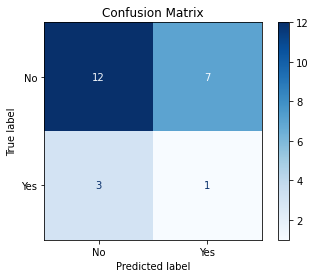

K-Fold Cross Validation Score: 0.87
AUC-ROC Score: 0.54
AUC-PR Score: 0.16


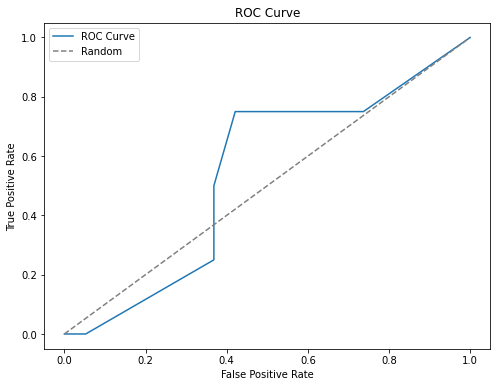

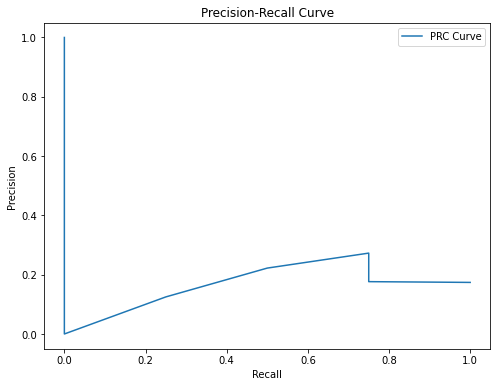

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Prediction with testing dataset:
y_test_pred = decision_tree.predict(X_test)
y_test_pred_proba = decision_tree.predict_proba(X_test)[:, 1]

# Find training accuracy for this model:
accuracy_train = accuracy_score(y_train, decision_tree.predict(X_train))
print("Training Accuracy: {:.2f}".format(accuracy_train))

# Find testing accuracy for this model:
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy: {:.2f}".format(accuracy_test))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

# Use ConfusionMatrixDisplay for visualization
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC-ROC Score
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Precision-Recall Curve and AUC-PR Score
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred_proba)
prc_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='PRC Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

# K-Fold Cross Validation
num_folds = 10
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
cv_scores = cross_val_score(decision_tree, X_train, y_train, cv=kfold, scoring='accuracy')
avg_cv_score = cv_scores.mean()

# Display K-Fold Cross Validation score
print("K-Fold Cross Validation Score: {:.2f}".format(avg_cv_score))

# Display AUC-ROC and AUC-PR Scores
print("AUC-ROC Score: {:.2f}".format(roc_auc))
print("AUC-PR Score: {:.2f}".format(prc_auc))


Training Accuracy: 0.74
Testing Accuracy: 0.61


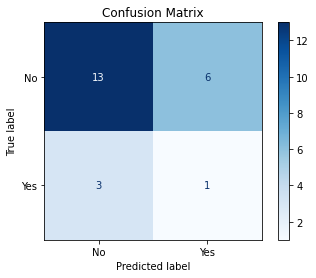

K-Fold Cross Validation Score: 0.87
AUC-ROC Score: 0.63
AUC-PR Score: 0.31


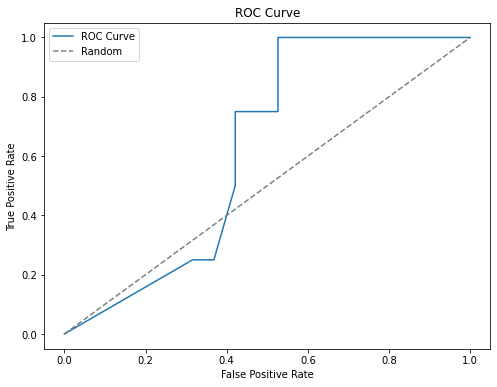

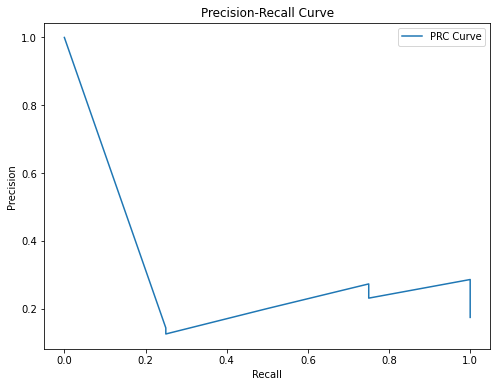

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Prediction with testing dataset:
y_test_pred = non_linear_svm.predict(X_test)
y_test_pred_proba = non_linear_svm.predict_proba(X_test)[:, 1]

# Find training accuracy for this model:
accuracy_train = accuracy_score(y_train, non_linear_svm.predict(X_train))
print("Training Accuracy: {:.2f}".format(accuracy_train))

# Find testing accuracy for this model:
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy: {:.2f}".format(accuracy_test))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

# Use ConfusionMatrixDisplay for visualization
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC-ROC Score
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Precision-Recall Curve and AUC-PR Score
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred_proba)
prc_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='PRC Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

# K-Fold Cross Validation
num_folds = 10
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
cv_scores = cross_val_score(non_linear_svm, X_train, y_train, cv=kfold, scoring='accuracy')
avg_cv_score = cv_scores.mean()

# Display K-Fold Cross Validation score
print("K-Fold Cross Validation Score: {:.2f}".format(avg_cv_score))

# Display AUC-ROC and AUC-PR Scores
print("AUC-ROC Score: {:.2f}".format(roc_auc))
print("AUC-PR Score: {:.2f}".format(prc_auc))


Training Accuracy: 0.74
Testing Accuracy: 0.61


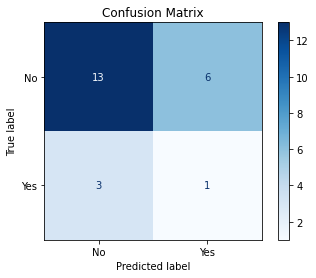

C:\Users\MYPC\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\MYPC\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\MYPC\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\MYPC\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warning

K-Fold Cross Validation Score: 0.87
AUC-ROC Score: 0.48
AUC-PR Score: 0.27


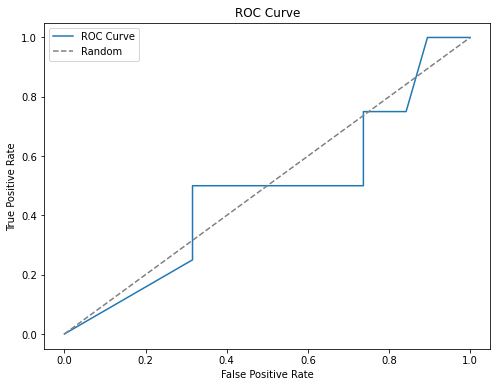

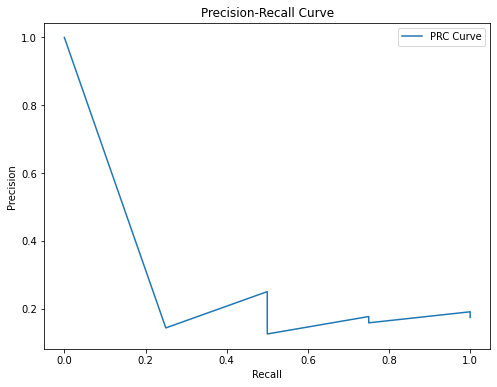

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Decision function scores
decision_values = linear_svm.decision_function(X_test)

# Transform the decision function scores to probabilities using a sigmoid function
y_test_pred_proba = 1 / (1 + 2.71828 ** (-decision_values))

# Find training accuracy for this model:
accuracy_train = accuracy_score(y_train, linear_svm.predict(X_train))
print("Training Accuracy: {:.2f}".format(accuracy_train))

# Find testing accuracy for this model:
accuracy_test = accuracy_score(y_test, linear_svm.predict(X_test))
print("Testing Accuracy: {:.2f}".format(accuracy_test))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, linear_svm.predict(X_test))
class_report = classification_report(y_test, linear_svm.predict(X_test))

# Use ConfusionMatrixDisplay for visualization
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC-ROC Score
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Precision-Recall Curve and AUC-PR Score
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred_proba)
prc_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='PRC Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

# K-Fold Cross Validation
num_folds = 10
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
cv_scores = cross_val_score(linear_svm, X_train, y_train, cv=kfold, scoring='accuracy')
avg_cv_score = cv_scores.mean()

# Display K-Fold Cross Validation score
print("K-Fold Cross Validation Score: {:.2f}".format(avg_cv_score))

# Display AUC-ROC and AUC-PR Scores
print("AUC-ROC Score: {:.2f}".format(roc_auc))
print("AUC-PR Score: {:.2f}".format(prc_auc))


Training Accuracy: 0.74
Testing Accuracy: 0.61


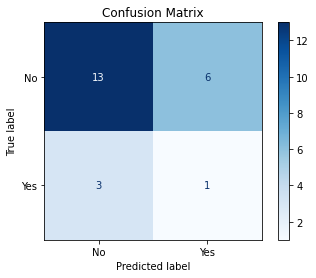

K-Fold Cross Validation Score: 0.87
AUC-ROC Score: 0.38
AUC-PR Score: 0.25


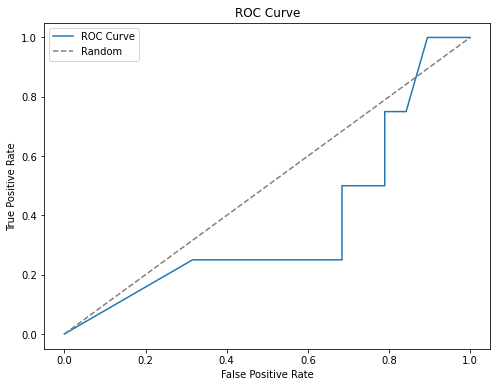

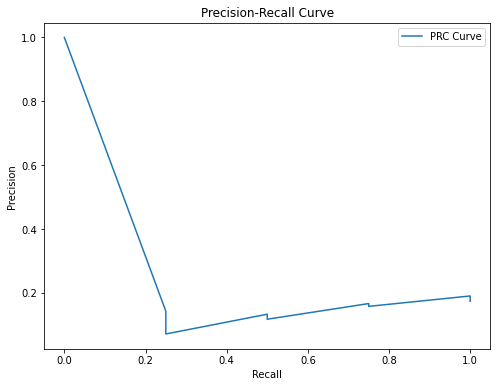

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Prediction with testing dataset:
y_test_pred = logistic_regression.predict(X_test)
y_test_pred_proba = logistic_regression.predict_proba(X_test)[:, 1]

# Find training accuracy for this model:
accuracy_train = accuracy_score(y_train, logistic_regression.predict(X_train))
print("Training Accuracy: {:.2f}".format(accuracy_train))

# Find testing accuracy for this model:
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy: {:.2f}".format(accuracy_test))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

# Use ConfusionMatrixDisplay for visualization
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC-ROC Score
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Precision-Recall Curve and AUC-PR Score
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred_proba)
prc_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='PRC Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

# K-Fold Cross Validation
num_folds = 10
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
cv_scores = cross_val_score(logistic_regression, X_train, y_train, cv=kfold, scoring='accuracy')
avg_cv_score = cv_scores.mean()

# Display K-Fold Cross Validation score
print("K-Fold Cross Validation Score: {:.2f}".format(avg_cv_score))

# Display AUC-ROC and AUC-PR Scores
print("AUC-ROC Score: {:.2f}".format(roc_auc))
print("AUC-PR Score: {:.2f}".format(prc_auc))


Training Accuracy: 0.76
Testing Accuracy: 0.57


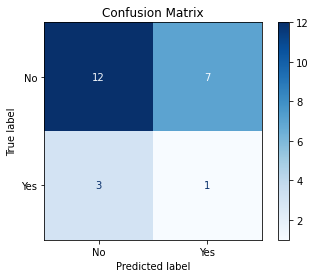

K-Fold Cross Validation Score: 0.87
AUC-ROC Score: 0.56
AUC-PR Score: 0.17


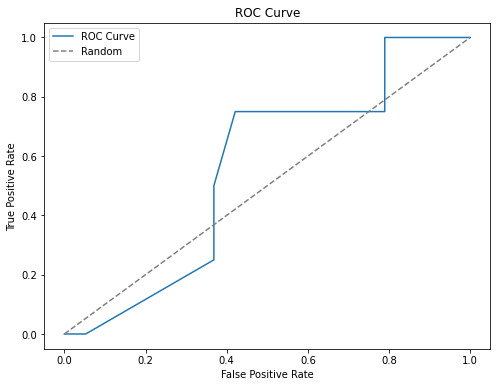

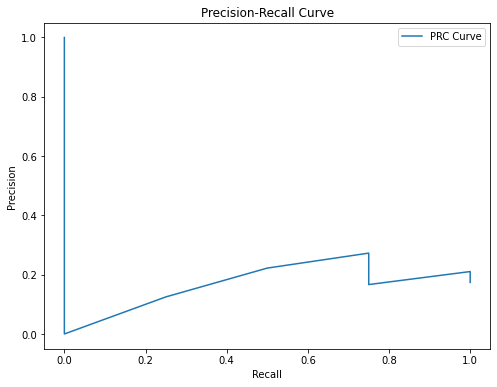

In [44]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Prediction with testing dataset:
y_test_pred = neural_network.predict(X_test)
y_test_pred_proba = neural_network.predict_proba(X_test)[:, 1]

# Find training accuracy for this model:
accuracy_train = accuracy_score(y_train, neural_network.predict(X_train))
print("Training Accuracy: {:.2f}".format(accuracy_train))

# Find testing accuracy for this model:
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy: {:.2f}".format(accuracy_test))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

# Use ConfusionMatrixDisplay for visualization
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC-ROC Score
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Precision-Recall Curve and AUC-PR Score
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred_proba)
prc_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='PRC Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

# K-Fold Cross Validation
num_folds = 10
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
cv_scores = cross_val_score(neural_network, X_train, y_train, cv=kfold, scoring='accuracy')
avg_cv_score = cv_scores.mean()

# Display K-Fold Cross Validation score
print("K-Fold Cross Validation Score: {:.2f}".format(avg_cv_score))

# Display AUC-ROC and AUC-PR Scores
print("AUC-ROC Score: {:.2f}".format(roc_auc))
print("AUC-PR Score: {:.2f}".format(prc_auc))


Training Accuracy: 0.76
Testing Accuracy: 0.57


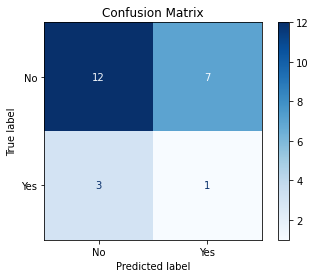

K-Fold Cross Validation Score: 0.87
AUC-ROC Score: 0.56
AUC-PR Score: 0.17


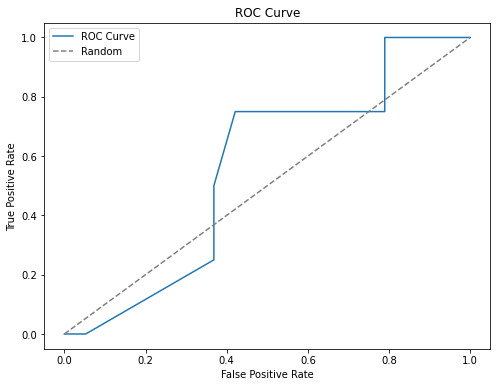

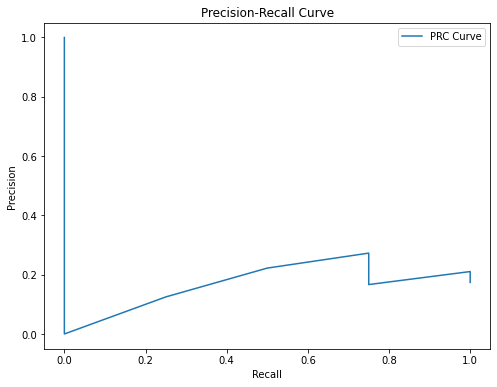

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Prediction with testing dataset:
y_test_pred = neural_network.predict(X_test)
y_test_pred_proba = neural_network.predict_proba(X_test)[:, 1]

# Find training accuracy for this model:
accuracy_train = accuracy_score(y_train, neural_network.predict(X_train))
print("Training Accuracy: {:.2f}".format(accuracy_train))

# Find testing accuracy for this model:
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy: {:.2f}".format(accuracy_test))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

# Use ConfusionMatrixDisplay for visualization
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC-ROC Score
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Precision-Recall Curve and AUC-PR Score
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred_proba)
prc_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='PRC Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

# K-Fold Cross Validation
num_folds = 10
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
cv_scores = cross_val_score(neural_network, X_train, y_train, cv=kfold, scoring='accuracy')
avg_cv_score = cv_scores.mean()

# Display K-Fold Cross Validation score
print("K-Fold Cross Validation Score: {:.2f}".format(avg_cv_score))

# Display AUC-ROC and AUC-PR Scores
print("AUC-ROC Score: {:.2f}".format(roc_auc))
print("AUC-PR Score: {:.2f}".format(prc_auc))


Training Accuracy: 0.62
Testing Accuracy: 0.43


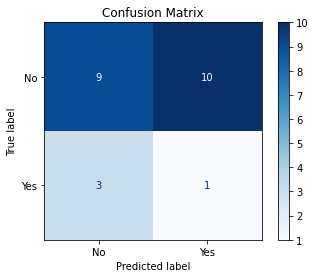

K-Fold Cross Validation Score: 0.74
AUC-ROC Score: 0.48
AUC-PR Score: 0.27


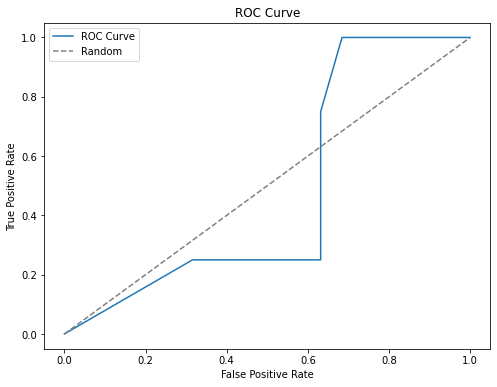

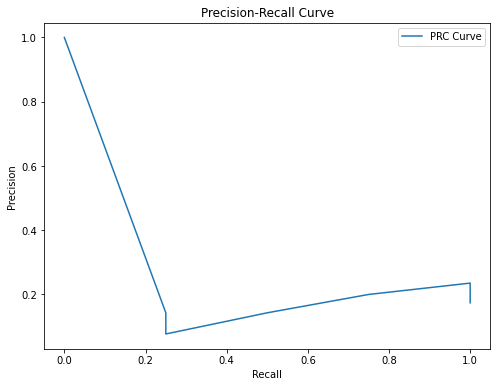

In [46]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Prediction with testing dataset:
y_test_pred = naive_bayes.predict(X_test)
y_test_pred_proba = naive_bayes.predict_proba(X_test)[:, 1]

# Find training accuracy for this model:
accuracy_train = accuracy_score(y_train, naive_bayes.predict(X_train))
print("Training Accuracy: {:.2f}".format(accuracy_train))

# Find testing accuracy for this model:
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy: {:.2f}".format(accuracy_test))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

# Use ConfusionMatrixDisplay for visualization
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC-ROC Score
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Precision-Recall Curve and AUC-PR Score
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred_proba)
prc_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='PRC Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

# K-Fold Cross Validation
num_folds = 10
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
cv_scores = cross_val_score(naive_bayes, X_train, y_train, cv=kfold, scoring='accuracy')
avg_cv_score = cv_scores.mean()

# Display K-Fold Cross Validation score
print("K-Fold Cross Validation Score: {:.2f}".format(avg_cv_score))

# Display AUC-ROC and AUC-PR Scores
print("AUC-ROC Score: {:.2f}".format(roc_auc))
print("AUC-PR Score: {:.2f}".format(prc_auc))


In [47]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, auc, roc_curve, precision_recall_curve, precision_score, recall_score, f1_score

def evaluate_model(model, X_train, y_train, X_test, y_test, kfold):
    # Prediction with training dataset:
    y_train_pred = model.predict(X_train)

    # Prediction with testing dataset:
    y_test_pred = model.predict(X_test)

    # Find training accuracy for this model:
    accuracy_train = accuracy_score(y_train, y_train_pred)

    # Find testing accuracy for this model:
    accuracy_test = accuracy_score(y_test, y_test_pred)

    # Precision, Recall, and F1 Score
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)

    # ROC Curve and AUC-ROC Score
    if hasattr(model, 'predict_proba'):
        fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    else:
        decision_values = model.decision_function(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, decision_values)

    roc_auc = auc(fpr, tpr)

    # Precision-Recall Curve and AUC-PR Score
    if hasattr(model, 'predict_proba'):
        precision_curve, recall_curve, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
    else:
        decision_values = model.decision_function(X_test)
        precision_curve, recall_curve, _ = precision_recall_curve(y_test, decision_values)

    prc_auc = auc(recall_curve, precision_curve)

    # K-Fold Cross Validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    avg_cv_score = cv_scores.mean()

    return {
        'Training Accuracy': accuracy_train,
        'Testing Accuracy': accuracy_test,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC-ROC Score': roc_auc,
        'AUC-PR Score': prc_auc,
        'K-Fold Score': avg_cv_score
    }


columns = ['Model', 'Training Accuracy', 'Testing Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC Score', 'AUC-PR Score', 'K-Fold Score']
model_evaluations = pd.DataFrame(columns=columns)

# List of models and their names
models = {
    'Random Forest': random_forest,
    'Gradient Boost': gradient_boost,
    'Decision Tree': decision_tree,
    'Non-linear SVM': non_linear_svm,
    'Neural Network': neural_network,
    'Naive Bayes': naive_bayes,
    'Linear SVM': linear_svm,
    'Logistic Regression': logistic_regression,
}

# Define the number of folds for cross-validation
num_folds = 10
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

for model_name, model in models.items():
    model_results = evaluate_model(model, X_train, y_train, X_test, y_test, kfold)
    model_results['Model'] = model_name
    model_evaluations = model_evaluations.append(model_results, ignore_index=True)

# Display the table
model_evaluations


C:\Users\MYPC\AppData\Local\Temp\ipykernel_13128\3596888474.py:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_evaluations = model_evaluations.append(model_results, ignore_index=True)
C:\Users\MYPC\AppData\Local\Temp\ipykernel_13128\3596888474.py:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_evaluations = model_evaluations.append(model_results, ignore_index=True)
C:\Users\MYPC\AppData\Local\Temp\ipykernel_13128\3596888474.py:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_evaluations = model_evaluations.append(model_results, ignore_index=True)
C:\Users\MYPC\AppData\Local\Temp\ipykernel_13128\3596888474.py:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

Model  Training Accuracy  Testing Accuracy  Precision  \
0        Random Forest           0.755556          0.565217   0.125000   
1       Gradient Boost           0.755556          0.565217   0.125000   
2        Decision Tree           0.755556          0.565217   0.125000   
3       Non-linear SVM           0.744444          0.608696   0.142857   
4       Neural Network           0.755556          0.565217   0.125000   
5          Naive Bayes           0.622222          0.434783   0.090909   
6           Linear SVM           0.744444          0.608696   0.142857   
7  Logistic Regression           0.744444          0.608696   0.142857   

   Recall  F1 Score  AUC-ROC Score  AUC-PR Score  K-Fold Score  
0    0.25  0.166667       0.546053      0.290688      0.866667  
1    0.25  0.166667       0.532895      0.163456      0.866667  
2    0.25  0.166667       0.539474      0.164694      0.866667  
3    0.25  0.181818       0.625000      0.307133      0.866667  
4    0.25  0.166667       0.559211      0.168046      0.866667  
5    0.25  0.133333       0.480263      0.267599      0.744444  
6    0.25  0.181818       0.480263      0.273194      0.866667  
7    0.25  0.181818       0.375000      0.247538      0.866667

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the parameter grid for GridSearchCV
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the RandomForestClassifier model
rf_model = RandomForestClassifier(class_weight='balanced')

# Create a GridSearchCV object
rf_grid = GridSearchCV(rf_model, param_grid=rf_params, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the training data
rf_grid.fit(X_train, y_train)

# Make predictions on the test set
rf_pred = rf_grid.predict(X_test)

# Calculate various metrics
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

# Print results
print(f'Random Forest - Best Parameters: {rf_grid.best_params_}')
print(f'Random Forest - Accuracy: {rf_accuracy}')
print(f'Random Forest - Precision: {rf_precision}')
print(f'Random Forest - Recall: {rf_recall}')
print(f'Random Forest - F1 Score: {rf_f1}')


Random Forest - Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest - Accuracy: 0.6086956521739131
Random Forest - Precision: 0.2727272727272727
Random Forest - Recall: 0.75
Random Forest - F1 Score: 0.39999999999999997


In [49]:
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, LeaveOneOut
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter distribution for RandomizedSearchCV
gb_params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Create a RandomizedSearchCV object
gb_random = RandomizedSearchCV(gb_model, param_distributions=gb_params, n_iter=50, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV object to the training data
gb_random.fit(X_train_scaled, y_train)

# Make predictions on the test set
gb_pred_random = gb_random.predict(X_test_scaled)

# Calculate metrics
gb_accuracy_random = accuracy_score(y_test, gb_pred_random)
gb_precision_random = precision_score(y_test, gb_pred_random, zero_division=1)
gb_recall_random = recall_score(y_test, gb_pred_random)
gb_f1_random = f1_score(y_test, gb_pred_random)

# Get probabilities for positive class (class 1)
gb_probabilities = gb_random.predict_proba(X_test_scaled)[:, 1]

# Print key information
# print(f'Gradient Boosting - Best Parameters: {gb_random.best_params_}')
print(f'Gradient Boosting - Accuracy: {gb_accuracy_random}')
print(f'Gradient Boosting - Precision: {gb_precision_random}')
print(f'Gradient Boosting - Recall: {gb_recall_random}')
print(f'Gradient Boosting - F1 Score: {gb_f1_random}')

# Adjusted metrics
print('\nAdjusted Metrics with Threshold Adjustment:')
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

for threshold in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    gb_pred_adjusted = (gb_probabilities > threshold).astype(int)
    gb_precision_adjusted = precision_score(y_test, gb_pred_adjusted, zero_division=1)
    gb_recall_adjusted = recall_score(y_test, gb_pred_adjusted)

    print(f'\nThreshold: {threshold}')
    print(f'  Adjusted Precision: {gb_precision_adjusted}')
    print(f'  Adjusted Recall: {gb_recall_adjusted}')

    # Append results to DataFrame
    results_df = results_df.append({
        'Model': 'Gradient Boosting',
#         'Best Parameters': gb_random.best_params_,
        'Accuracy': gb_accuracy_random,
        'Precision': gb_precision_adjusted,
        'Recall': gb_recall_adjusted,
        'F1 Score': gb_f1_random
    }, ignore_index=True)

# Display the final DataFrame with results for all models
print("\nResults for all models:")
results_df


Gradient Boosting - Accuracy: 0.9130434782608695
Gradient Boosting - Precision: 1.0
Gradient Boosting - Recall: 0.0
Gradient Boosting - F1 Score: 0.0

Adjusted Metrics with Threshold Adjustment:

Threshold: 0.1
  Adjusted Precision: 0.10526315789473684
  Adjusted Recall: 1.0

Threshold: 0.2
  Adjusted Precision: 0.16666666666666666
  Adjusted Recall: 1.0

Threshold: 0.3
  Adjusted Precision: 1.0
  Adjusted Recall: 0.0

Threshold: 0.4
  Adjusted Precision: 1.0
  Adjusted Recall: 0.0

Threshold: 0.5
  Adjusted Precision: 1.0
  Adjusted Recall: 0.0

Threshold: 0.6
  Adjusted Precision: 1.0
  Adjusted Recall: 0.0

Threshold: 0.7
  Adjusted Precision: 1.0
  Adjusted Recall: 0.0

Threshold: 0.8
  Adjusted Precision: 1.0
  Adjusted Recall: 0.0

Threshold: 0.9
  Adjusted Precision: 1.0
  Adjusted Recall: 0.0

Results for all models:


C:\Users\MYPC\AppData\Local\Temp\ipykernel_13128\2034850194.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\MYPC\AppData\Local\Temp\ipykernel_13128\2034850194.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\MYPC\AppData\Local\Temp\ipykernel_13128\2034850194.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\MYPC\AppData\Local\Temp\ipykernel_13128\2034850194.py:70: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\MYPC\AppData\Local\Temp\ipykernel_13128\2034850194.

Model  Accuracy  Precision  Recall  F1 Score
0  Gradient Boosting  0.913043   0.105263     1.0       0.0
1  Gradient Boosting  0.913043   0.166667     1.0       0.0
2  Gradient Boosting  0.913043   1.000000     0.0       0.0
3  Gradient Boosting  0.913043   1.000000     0.0       0.0
4  Gradient Boosting  0.913043   1.000000     0.0       0.0
5  Gradient Boosting  0.913043   1.000000     0.0       0.0
6  Gradient Boosting  0.913043   1.000000     0.0       0.0
7  Gradient Boosting  0.913043   1.000000     0.0       0.0
8  Gradient Boosting  0.913043   1.000000     0.0       0.0

In [50]:
from sklearn.model_selection import RandomizedSearchCV, LeaveOneOut
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the parameter distribution for RandomizedSearchCV
mlp_params = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['logistic', 'relu'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [500, 1000],  # Increase max_iter
    'learning_rate_init': [0.001, 0.01, 0.1],
    'early_stopping': [True],  # Enable early stopping
    'validation_fraction': [0.1, 0.2],
    'n_iter_no_change': [10, 20]
}

# Initialize the MLP model
mlp_model = MLPClassifier()

# Create a RandomizedSearchCV object with Leave-One-Out cross-validation
mlp_random = RandomizedSearchCV(mlp_model, param_distributions=mlp_params, n_iter=50, cv=LeaveOneOut(), scoring='accuracy', n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV object to the data
mlp_random.fit(X_scaled, y)

# Make predictions
mlp_pred_random = mlp_random.predict(X_scaled)

# Calculate various metrics
mlp_accuracy_random = accuracy_score(y, mlp_pred_random)
mlp_precision_random = precision_score(y, mlp_pred_random, zero_division=1)
mlp_recall_random = recall_score(y, mlp_pred_random)
mlp_f1_random = f1_score(y, mlp_pred_random)

# Print results
print(f'Neural Network(MLP) - Best Parameters: {mlp_random.best_params_}')
print(f'Neural Network(MLP) - Accuracy: {mlp_accuracy_random}')
print(f'Neural Network(MLP) - Precision: {mlp_precision_random}')
print(f'Neural Network(MLP) - Recall: {mlp_recall_random}')
print(f'Neural Network(MLP) - F1 Score: {mlp_f1_random}')


Neural Network(MLP) - Best Parameters: {'validation_fraction': 0.1, 'n_iter_no_change': 10, 'max_iter': 500, 'learning_rate_init': 0.01, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (150,), 'early_stopping': True, 'alpha': 0.01, 'activation': 'relu'}
Neural Network(MLP) - Accuracy: 0.8584070796460177
Neural Network(MLP) - Precision: 1.0
Neural Network(MLP) - Recall: 0.0
Neural Network(MLP) - F1 Score: 0.0


In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the parameter grid for GridSearchCV
lr_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear']
}

# Initialize the Logistic Regression model
lr_model = LogisticRegression(class_weight='balanced')

# Create a GridSearchCV object
lr_grid = GridSearchCV(lr_model, param_grid=lr_params, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the training data (you may need to use a subset of the data due to the size)
lr_grid.fit(X_train, y_train)

# Make predictions on the test set
lr_pred = lr_grid.predict(X_test)

# Calculate various metrics
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)

# Print results
print(f'Logistic Regression - Best Parameters: {lr_grid.best_params_}')
print(f'Logistic Regression - Accuracy: {lr_accuracy}')
print(f'Logistic Regression - Precision: {lr_precision}')
print(f'Logistic Regression - Recall: {lr_recall}')
print(f'Logistic Regression - F1 Score: {lr_f1}')


Logistic Regression - Best Parameters: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
Logistic Regression - Accuracy: 0.9130434782608695
Logistic Regression - Precision: 0.0
Logistic Regression - Recall: 0.0
Logistic Regression - F1 Score: 0.0


C:\Users\MYPC\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the parameter grid for GridSearchCV
lsvm_params = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'loss': ['hinge']
}

# Initialize the LinearSVC model
linear_svm = LinearSVC(class_weight='balanced')

# Create a GridSearchCV object
lsvm_grid = GridSearchCV(linear_svm, param_grid=lsvm_params, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the training data
lsvm_grid.fit(X_train, y_train)

# Make predictions on the test set
lsvm_pred = lsvm_grid.predict(X_test)

# Calculate various metrics
lsvm_accuracy = accuracy_score(y_test, lsvm_pred)
lsvm_precision = precision_score(y_test, lsvm_pred)
lsvm_recall = recall_score(y_test, lsvm_pred)
lsvm_f1 = f1_score(y_test, lsvm_pred)

# Print results
print(f'Linear SVM - Best Parameters: {lsvm_grid.best_params_}')
print(f'Linear SVM - Accuracy: {lsvm_accuracy}')
print(f'Linear SVM - Precision: {lsvm_precision}')
print(f'Linear SVM - Recall: {lsvm_recall}')
print(f'Linear SVM - F1 Score: {lsvm_f1}')


Linear SVM - Best Parameters: {'C': 10, 'loss': 'hinge'}
Linear SVM - Accuracy: 0.2608695652173913
Linear SVM - Precision: 0.10526315789473684
Linear SVM - Recall: 1.0
Linear SVM - F1 Score: 0.1904761904761905


C:\Users\MYPC\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [53]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the parameter grid for GridSearchCV
nlsvm_params = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'] + [0.001, 0.01, 0.1, 1, 10]
}

# Initialize the non-linear SVM model with class_weight='balanced'
non_linear_svm = SVC(class_weight='balanced')

# Create a GridSearchCV object
nlsvm_grid = GridSearchCV(non_linear_svm, param_grid=nlsvm_params, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the training data
nlsvm_grid.fit(X_train, y_train)

# Make predictions on the test set
nlsvm_pred = nlsvm_grid.predict(X_test)

# Calculate various metrics
nlsvm_accuracy = accuracy_score(y_test, nlsvm_pred)
nlsvm_precision = precision_score(y_test, nlsvm_pred)
nlsvm_recall = recall_score(y_test, nlsvm_pred)
nlsvm_f1 = f1_score(y_test, nlsvm_pred)

# Print results
print(f'Non-Linear SVM - Best Parameters: {nlsvm_grid.best_params_}')
print(f'Non-Linear SVM - Accuracy: {nlsvm_accuracy}')
print(f'Non-Linear SVM - Precision: {nlsvm_precision}')
print(f'Non-Linear SVM - Recall: {nlsvm_recall}')
print(f'Non-Linear SVM - F1 Score: {nlsvm_f1}')


Non-Linear SVM - Best Parameters: {'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}
Non-Linear SVM - Accuracy: 0.08695652173913043
Non-Linear SVM - Precision: 0.08695652173913043
Non-Linear SVM - Recall: 1.0
Non-Linear SVM - F1 Score: 0.16


In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

decision_tree = DecisionTreeClassifier(class_weight='balanced')

dt_grid = GridSearchCV(decision_tree, param_grid=dt_params, cv=5, scoring='accuracy', n_jobs=-1)
dt_grid.fit(X_train, y_train)

# Calculate various metrics
dt_pred = dt_grid.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)

# Print results
print(f'Decision Tree - Best Parameters: {dt_grid.best_params_}')
print(f'Decision Tree - Accuracy: {dt_accuracy}')
print(f'Decision Tree - Precision: {dt_precision}')
print(f'Decision Tree - Recall: {dt_recall}')
print(f'Decision Tree - F1 Score: {dt_f1}')


Decision Tree - Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree - Accuracy: 0.5217391304347826
Decision Tree - Precision: 0.15384615384615385
Decision Tree - Recall: 1.0
Decision Tree - F1 Score: 0.2666666666666667


In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTEN
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np


X = df_selected_cleaned_reset.drop("memory_complain", axis=1)
y = df_selected_cleaned_reset["memory_complain"]

# # Print class distribution before oversampling
# print("Class Distribution Before Oversampling:")
# print(y.value_counts())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

# Use SMOTEN to oversample the minority class on the training set only
smoten = SMOTEN(random_state=0)
X_resampled, y_resampled = smoten.fit_resample(X_train, y_train)

# # Print class distribution after oversampling
# print("\nClass Distribution After Oversampling:")
# print(y_resampled.value_counts())

# Perform k-fold cross-validation with oversampling
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Initialize an array to store cross-validation accuracies
cv_accuracies = []

# Initialize a Logistic Regression model
lr = LogisticRegression()

for train_index, val_index in stratified_kfold.split(X_resampled, y_resampled):
    X_train_fold, X_val_fold = X_resampled.iloc[train_index], X_resampled.iloc[val_index]
    y_train_fold, y_val_fold = y_resampled[train_index], y_resampled[val_index]

    # Create Logistic Regression model for each fold
    # Fit it on the resampled data for this fold
    lr_fold = lr.fit(X_train_fold, y_train_fold)

    # Prediction with validation dataset for this fold
    y_val_pred = lr_fold.predict(X_val_fold)

    # Accuracy for this fold
    accuracy_fold = accuracy_score(y_val_fold, y_val_pred)
    cv_accuracies.append(accuracy_fold)

# Print testing accuracy
y_test_pred = lr_fold.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)

# AUC-ROC and AUC-PR for Logistic Regression
lr_probs = lr_fold.predict_proba(X_test)[:, 1]
roc_auc_lr = roc_auc_score(y_test, lr_probs)
pr_auc_lr = average_precision_score(y_test, lr_probs)

# After cross-validation, train the final model using the entire original training set
final_model_lr = lr.fit(X_train, y_train)

# Initialize an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Training Accuracy', 'Testing Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC', 'AUC-PR', 'K-Fold Score'])

# Logistic Regression
results_df = results_df.append({
    'Model': 'Logistic Regression',
    'Training Accuracy': final_model_lr.score(X_train, y_train),
    'Testing Accuracy': accuracy_test,
    'Precision': precision_score(y_test, y_test_pred),
    'Recall': recall_score(y_test, y_test_pred),
    'F1 Score': f1_score(y_test, y_test_pred),
    'AUC-ROC': roc_auc_lr,
    'AUC-PR': pr_auc_lr,
    'K-Fold Score': np.mean(cv_accuracies)
}, ignore_index=True)

# Random Forest
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(class_weight='balanced')
rf_grid = GridSearchCV(rf_model, param_grid=rf_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)
rf_pred = rf_grid.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

# AUC-ROC and AUC-PR for Random Forest
rf_probs = rf_grid.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, rf_probs)
pr_auc_rf = average_precision_score(y_test, rf_probs)

results_df = results_df.append({
    'Model': 'Random Forest',
    'Training Accuracy': rf_grid.best_estimator_.score(X_train, y_train),
    'Testing Accuracy': rf_accuracy,
    'Precision': precision_score(y_test, rf_pred),
    'Recall': recall_score(y_test, rf_pred),
    'F1 Score': f1_score(y_test, rf_pred),
    'AUC-ROC': roc_auc_rf,
    'AUC-PR': pr_auc_rf,
    'K-Fold Score': cross_val_score(rf_grid.best_estimator_, X_train, y_train, cv=stratified_kfold, scoring='accuracy').mean()
}, ignore_index=True)

# Neural Network (MLP)
mlp_model = MLPClassifier(random_state=0)
mlp_model.fit(X_resampled, y_resampled)
mlp_pred = mlp_model.predict(X_test)
mlp_accuracy_random = accuracy_score(y_test, mlp_pred)

# AUC-ROC and AUC-PR for MLP
mlp_probs = mlp_model.predict_proba(X_test)[:, 1]
roc_auc_mlp = roc_auc_score(y_test, mlp_probs)
pr_auc_mlp = average_precision_score(y_test, mlp_probs)

results_df = results_df.append({
    'Model': 'Neural Network (MLP)',
    'Training Accuracy': mlp_model.score(X_resampled, y_resampled),
    'Testing Accuracy': mlp_accuracy_random,
    'Precision': precision_score(y_test, mlp_pred),
    'Recall': recall_score(y_test, mlp_pred),
    'F1 Score': f1_score(y_test, mlp_pred),
    'AUC-ROC': roc_auc_mlp,
    'AUC-PR': pr_auc_mlp,
    'K-Fold Score': cross_val_score(mlp_model, X_train, y_train, cv=stratified_kfold, scoring='accuracy').mean()
}, ignore_index=True)

# Linear SVM
lsvm_model = SVC(kernel='linear', class_weight='balanced', random_state=0)
lsvm_model.fit(X_resampled, y_resampled)
lsvm_pred = lsvm_model.predict(X_test)
lsvm_accuracy = accuracy_score(y_test, lsvm_pred)

# AUC-ROC and AUC-PR for Linear SVM
lsvm_probs = lsvm_model.decision_function(X_test)
roc_auc_lsvm = roc_auc_score(y_test, lsvm_probs)
pr_auc_lsvm = average_precision_score(y_test, lsvm_probs)

results_df = results_df.append({
    'Model': 'Linear SVM',
    'Training Accuracy': lsvm_model.score(X_resampled, y_resampled),
    'Testing Accuracy': lsvm_accuracy,
    'Precision': precision_score(y_test, lsvm_pred),
    'Recall': recall_score(y_test, lsvm_pred),
    'F1 Score': f1_score(y_test, lsvm_pred),
    'AUC-ROC': roc_auc_lsvm,
    'AUC-PR': pr_auc_lsvm,
    'K-Fold Score': cross_val_score(lsvm_model, X_train, y_train, cv=stratified_kfold, scoring='accuracy').mean()
}, ignore_index=True)

# Non-Linear SVM
nlsvm_model = SVC(kernel='rbf', class_weight='balanced', random_state=0)
nlsvm_model.fit(X_resampled, y_resampled)
nlsvm_pred = nlsvm_model.predict(X_test)
nlsvm_accuracy = accuracy_score(y_test, nlsvm_pred)

# AUC-ROC and AUC-PR for Non-Linear SVM
nlsvm_probs = nlsvm_model.decision_function(X_test)
roc_auc_nlsvm = roc_auc_score(y_test, nlsvm_probs)
pr_auc_nlsvm = average_precision_score(y_test, nlsvm_probs)

results_df = results_df.append({
    'Model': 'Non-Linear SVM',
    'Training Accuracy': nlsvm_model.score(X_resampled, y_resampled),
    'Testing Accuracy': nlsvm_accuracy,
    'Precision': precision_score(y_test, nlsvm_pred),
    'Recall': recall_score(y_test, nlsvm_pred),
    'F1 Score': f1_score(y_test, nlsvm_pred),
    'AUC-ROC': roc_auc_nlsvm,
    'AUC-PR': pr_auc_nlsvm,
    'K-Fold Score': cross_val_score(nlsvm_model, X_train, y_train, cv=stratified_kfold, scoring='accuracy').mean()
}, ignore_index=True)

# Decision Tree
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=0)
dt_model.fit(X_resampled, y_resampled)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

# AUC-ROC and AUC-PR for Decision Tree
dt_probs = dt_model.predict_proba(X_test)[:, 1]
roc_auc_dt = roc_auc_score(y_test, dt_probs)
pr_auc_dt = average_precision_score(y_test, dt_probs)

results_df = results_df.append({
    'Model': 'Decision Tree',
    'Training Accuracy': dt_model.score(X_resampled, y_resampled),
    'Testing Accuracy': dt_accuracy,
    'Precision': precision_score(y_test, dt_pred),
    'Recall': recall_score(y_test, dt_pred),
    'F1 Score': f1_score(y_test, dt_pred),
    'AUC-ROC': roc_auc_dt,
    'AUC-PR': pr_auc_dt,
    'K-Fold Score': cross_val_score(dt_model, X_train, y_train, cv=stratified_kfold, scoring='accuracy').mean()
}, ignore_index=True)

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_resampled, y_resampled)
nb_pred = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)

# AUC-ROC and AUC-PR for Naive Bayes
nb_probs = nb_model.predict_proba(X_test)[:, 1]
roc_auc_nb = roc_auc_score(y_test, nb_probs)
pr_auc_nb = average_precision_score(y_test, nb_probs)

results_df = results_df.append({
    'Model': 'Naive Bayes',
    'Training Accuracy': nb_model.score(X_resampled, y_resampled),
    'Testing Accuracy': nb_accuracy,
    'Precision': precision_score(y_test, nb_pred),
    'Recall': recall_score(y_test, nb_pred),
    'F1 Score': f1_score(y_test, nb_pred),
    'AUC-ROC': roc_auc_nb,
    'AUC-PR': pr_auc_nb,
    'K-Fold Score': cross_val_score(nb_model, X_train, y_train, cv=stratified_kfold, scoring='accuracy').mean()
}, ignore_index=True)

# Gradient Boost
gb_model = GradientBoostingClassifier()
gb_model.fit(X_resampled, y_resampled)
gb_pred = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

# AUC-ROC and AUC-PR for Gradient Boost
gb_probs = gb_model.predict_proba(X_test)[:, 1]
roc_auc_gb = roc_auc_score(y_test, gb_probs)
pr_auc_gb = average_precision_score(y_test, gb_probs)

results_df = results_df.append({
    'Model': 'Gradient Boost',
    'Training Accuracy': gb_model.score(X_resampled, y_resampled),
    'Testing Accuracy': gb_accuracy,
    'Precision': precision_score(y_test, gb_pred),
    'Recall': recall_score(y_test, gb_pred),
    'F1 Score': f1_score(y_test, gb_pred),
    'AUC-ROC': roc_auc_gb,
    'AUC-PR': pr_auc_gb,
    'K-Fold Score': cross_val_score(gb_model, X_train, y_train, cv=stratified_kfold, scoring='accuracy').mean()
}, ignore_index=True)

# Print the results DataFrame
results_df


C:\Users\MYPC\AppData\Local\Temp\ipykernel_13128\2849620099.py:76: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\MYPC\AppData\Local\Temp\ipykernel_13128\2849620099.py:107: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\MYPC\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\MYPC\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\MYPC\AppData\Roaming\P

Model  Training Accuracy  Testing Accuracy  Precision  \
0   Logistic Regression           0.866667          0.434783   0.090909   
1         Random Forest           0.744444          0.608696   0.222222   
2  Neural Network (MLP)           0.782051          0.434783   0.090909   
3            Linear SVM           0.782051          0.434783   0.090909   
4        Non-Linear SVM           0.782051          0.434783   0.090909   
5         Decision Tree           0.794872          0.304348   0.071429   
6           Naive Bayes           0.782051          0.434783   0.090909   
7        Gradient Boost           0.794872          0.391304   0.083333   

   Recall  F1 Score   AUC-ROC    AUC-PR  K-Fold Score  
0    0.25  0.133333  0.348684  0.154412      0.776008  
1    0.50  0.307692  0.625000  0.426136      0.644444  
2    0.25  0.133333  0.322368  0.150585      0.866667  
3    0.25  0.133333  0.401316  0.160714      0.311111  
4    0.25  0.133333  0.401316  0.163714      0.577778  
5    0.25  0.111111  0.342105  0.145929      0.600000  
6    0.25  0.133333  0.467105  0.176984      0.777778  
7    0.25  0.125000  0.414474  0.165166      0.833333

In [56]:
import joblib


# Save Random Forest model
joblib.dump(rf_grid.best_estimator_, 'random_forest_model.joblib')


['random_forest_model.joblib']

In [57]:
#load saved model
joblib_file_path = r'C:\Users\MYPC\Downloads\random_forest_model.joblib'

try:
    # Load the content of the joblib file
    random_forest = joblib.load(joblib_file_path)

    # Print information about the content
    print(random_forest)

except Exception as e:
    print(f"Error loading joblib file: {e}")

RandomForestClassifier(class_weight='balanced', max_depth=30,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=50)


In [58]:
import pandas as pd
import numpy as np


# Define a function to map categories to ordinal values
def map_categories(column, categories):
    return column.map({cat: i for i, cat in enumerate(categories)})


input_data = {
    'vision': ['Sees poor'],
    'audition': ['Hears moderately'],
    'gait_speed_slower': ['Yes'],
    'grip_strength_abnormal': ['Yes'],
    'low_physical_activity': ['Yes']
}

# Drop 'memory_complain' from df_selected_cleaned_reset
df_selected_cleaned_reset = df_selected_cleaned_reset.drop('memory_complain', axis=1, errors='ignore')

# Create a DataFrame from the input_data
input_df = pd.DataFrame(input_data)

# Map categories to ordinal values
input_df['vision'] = map_categories(input_df['vision'], ['Sees poorly', 'Sees moderately', 'Sees well'])
input_df['audition'] = map_categories(input_df['audition'], ['Hears poorly', 'Hears moderately', 'Hears well'])

# Convert NaN values to a placeholder
input_df = input_df.fillna(-1)

# Remove 'memory_complain' from input features
input_df = input_df.drop('memory_complain', axis=1, errors='ignore')

print("Feature Names in Jupyter:", input_df.columns)
print("Feature Values in Jupyter:", input_df.values)


# Assuming 'label_encoder' is an instance of the label encoder fitted on 'gait_speed_slower', 'grip_strength_abnormal', and 'low_physical_activity'
input_df['gait_speed_slower'] = label_encoder.transform(input_df['gait_speed_slower'])
input_df['grip_strength_abnormal'] = label_encoder.transform(input_df['grip_strength_abnormal'])
input_df['low_physical_activity'] = label_encoder.transform(input_df['low_physical_activity'])

# Get the missing columns based on the trained model's expectations
missing_columns = list(set(df_selected_cleaned_reset.columns) - set(input_df.columns))

# Add missing columns and set their values to zero
for col in missing_columns:
    input_df[col] = 0

# Ensure the columns are in the same order as in the trained model
input_df = input_df[df_selected_cleaned_reset.columns]

# Check if the number of features in the input matches the model's expectations
if len(input_df.columns) != random_forest.n_features_in_:
    raise ValueError(f"Number of features in input ({len(input_df.columns)}) does not match the model's expectations ({random_forest.n_features_in_}).")

# Reshape the input data to match the format expected by the model
input_data_encoded_reshaped = input_df.values.reshape(1, -1)

# Use the trained model to make predictions on the test data
probabilities = random_forest.predict_proba(input_data_encoded_reshaped)[:, 1]
print(f"Probabilities of dementia: {probabilities}")

joblib.dump(ordinal_encoder, 'ordinal_encoder.joblib')

# Save label_encoder to a file
joblib.dump(label_encoder, 'label_encoder.joblib')                               

Feature Names in Jupyter: Index(['vision', 'audition', 'gait_speed_slower', 'grip_strength_abnormal',
       'low_physical_activity'],
      dtype='object')
Feature Values in Jupyter: [[-1.0 1 'Yes' 'Yes' 'Yes']]
Probabilities of dementia: [0.50417744]


C:\Users\MYPC\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


['label_encoder.joblib']

# Co-creating
I have established a collaborative partnership with Enabling Village to collectively nurture and refine this idea. Our joint efforts aim to create a solution that is not only innovative but also aligns with the diverse needs of the community.


Cooperation:

Actively collaborating with healthcare professionals and relevant stakeholders showcases a commitment to cooperation in developing a robust dementia prediction model.
Information Exchange:

The ongoing exchange of information between different contributors ensures a comprehensive understanding of the dataset and its implications.
Input Gathering:

Valuable inputs from healthcare experts have significantly influenced the model, enhancing its accuracy and relevance.


This collaborative initiative emphasizes the importance of involving diverse perspectives and expertise in the development of a dataset-driven solution for dementia prediction.



https://enablingvillage.sg/portfolio-items/caregivers-pod/



In [61]:
# df_selected_cleaned_reset.to_csv("Dementia.csv", index=False)